In [578]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE

In [591]:
athlete = pd.read_csv('D:\\Data\\athlete.csv')

In [622]:
people = pd.read_csv('D:\\Data\\people.csv')

In [648]:
milk_products = pd.read_csv('D:\\Data\\milk_products.csv')

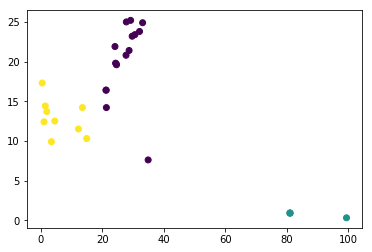

In [652]:
x = milk_products['Fat']
y = milk_products['Protein']
#plt.plot(x,y,'gx')
kmeans = KMeans(n_clusters=3, random_state=0).fit(milk_products.reindex(columns=['Fat','Protein']))
plt.scatter(x, y, c=kmeans.labels_)
#print(milk_products)

                         Name  Height  Weight     Class  Predicted
0         Paulo Roberto Paula     170      55  Marathon          1
1                Henryk Szost     185      68  Marathon          0
2             Ruggero Pertile     170      56  Marathon          1
3              Viktor Rothlin     172      60  Marathon          1
4        Oleksandr Sitkovskyy     184      68  Marathon          0
5           Franck de Almeida     173      49  Marathon          1
6             Aleksey Reunkov     176      63  Marathon          1
7           Stephen Kiprotich     172      56  Marathon          1
8    Wilson Kipsang Kiprotich     182      62  Marathon          1
9              Meb Keflezighi     165      58  Marathon          1
10  Marilson Gomes dos Santos     174      58  Marathon          1
11           Kentaro Nakamoto     173      58  Marathon          1
12          Cuthbert Nyasango     163      56  Marathon          1
13            Dmitry Safronov     189      73  Marathon       

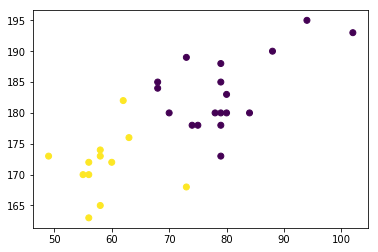

In [597]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(athlete.reindex(columns=['Weight','Height']))

#print(kmeans.labels_)
#print(kmeans.cluster_centers_)

x = athlete['Weight']
y = athlete['Height']
athlete['Predicted'] = kmeans.labels_
plt.scatter(x, y, c=kmeans.labels_)
print(athlete)

[ 0.66100746 -8.88507463]
13.2242910448
13.224291044776107


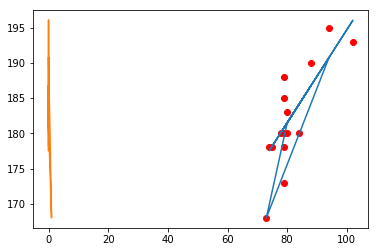

In [598]:
#print(athlete.describe())

train = athlete[athlete['Class'] == '100m']
#train = athlete.sample(frac=0.8)
test = athlete.drop(train.index)

#print(train)
x = train['Weight']
y = train['Height']

plt.scatter(x, y, c='r')

#print(people)

mdl = LinearRegression()
train_x = train.drop(['Height', 'Name', 'Class'], axis=1)
train_y = train['Height']

test_x = test.drop(['Height', 'Name', 'Class'], axis=1)
test_y = test['Height']


mdl.fit(train_x, train_y)
m = mdl.coef_
print(m)

plt.plot(train_x, mdl.predict(train_x), '-')
#print(mse(mdl.predict(test_x), test_y))
print(mse(mdl.predict(train_x), train_y))
print(np.mean((mdl.predict(train_x) - train_y) ** 2))

       Height     Weight   Age  isMale  Predicted
0    151.7650  47.825606  63.0       1          0
1    139.7000  36.485807  63.0       0          0
2    136.5250  31.864838  65.0       0          0
3    156.8450  53.041915  41.0       1          0
4    145.4150  41.276872  51.0       0          0
5    163.8300  62.992589  35.0       1          0
6    149.2250  38.243476  32.0       0          0
7    168.9100  55.479971  27.0       1          0
8    147.9550  34.869885  19.0       0          0
9    165.1000  54.487739  54.0       1          0
10   154.3050  49.895120  47.0       0          0
11   151.1300  41.220173  66.0       1          0
12   144.7800  36.032215  73.0       0          0
13   149.9000  47.700000  20.0       0          0
14   150.4950  33.849303  65.3       0          0
15   163.1950  48.562694  36.0       1          0
16   157.4800  42.325803  44.0       1          0
17   143.9418  38.356873  31.0       0          0
18   121.9200  19.617854  12.0       1          1


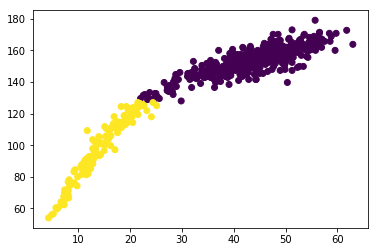

In [600]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(people.reindex(columns=['Weight','Height']))

#print(kmeans.labels_)
#print(kmeans.cluster_centers_)

x = people['Weight']
y = people['Height']
people['Predicted'] = kmeans.labels_
plt.scatter(x, y, c=kmeans.labels_)
print(people)

[ 0.93106288]
936.619102177
25.0708851086
25.070885108619866


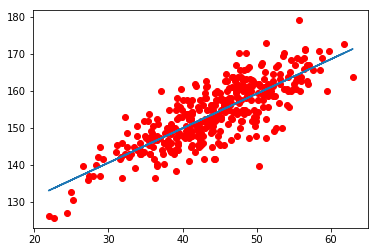

In [647]:

people = pd.read_csv('D:\\Data\\people.csv')

#print(people.describe())
#people =people[people['Age'] > 30]
train = people[people['Age'] > 14]
#train = people.sample(frac=0.8)
test = people.drop(train.index)

#print(train)
x = train['Weight']
y = train['Height']

plt.scatter(x, y, c='r')

#print(people)

mdl = LinearRegression()
train_x = train.drop(['Age', 'Height', 'isMale'], axis=1)
train_y = train['Height']

test_x = test.drop(['Age', 'Height', 'isMale'], axis=1)
test_y = test['Height']


mdl.fit(train_x, train_y)
m = mdl.coef_
print(m)

plt.plot(train_x, mdl.predict(train_x), '-')
print(mse(mdl.predict(test_x), test_y))
print(mse(mdl.predict(train_x), train_y))
print(np.mean((mdl.predict(train_x) - train_y) ** 2))

[ 3.07876842  1.4171407   0.        ]
26.4661075328
13.6889003234
[ 0.8432972   0.89879662  0.90654917  0.96522563  0.9411349 ]
Index(['Weight', 'Age'], dtype='object')


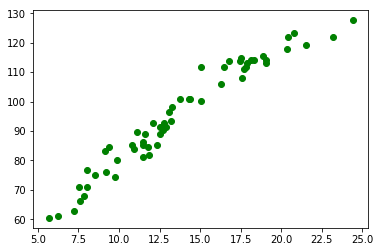

In [653]:
#print(people.describe())
people =people[people['Age'] < 10]
train = people[people['isMale'] == 1]
#train = people.sample(frac=0.9)
test = people.drop(train.index)

#print(train)
x = train['Weight']
y = train['Height']

plt.scatter(x, y, c='g')


#print(people)

mdl = LinearRegression()
train_x = train.drop(['Height'], axis=1)
train_y = train['Height']

test_x = test.drop(['Height'], axis=1)
test_y = test['Height']


mdl.fit(train_x, train_y)
m = mdl.coef_
print(m)

print(mse(mdl.predict(test_x), test_y))
print(mse(mdl.predict(train_x), train_y))

print(cross_val_score(mdl, train_x, train_y, cv=5))

rfe = RFE(mdl, 2)
r = rfe.fit(train_x,train_y)
print(train_x.columns[r.support_])


Automatically created module for IPython interactive environment
[6 6 6 ..., 9 8 8]



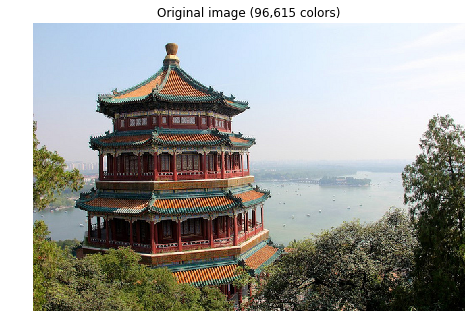

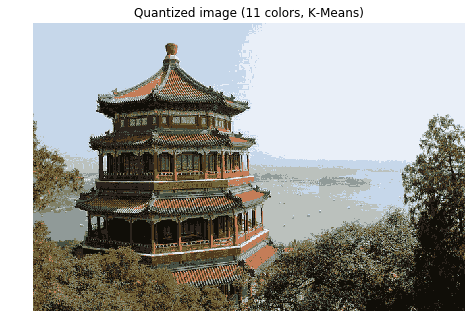

In [654]:
# taken from http://scikit-learn.org/stable/auto_examples/cluster/plot_color_quantization.html

%matplotlib inline
print(__doc__)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time

n_colors = 11

china = load_sample_image("china.jpg")
#print(china)
china = np.array(china, dtype=np.float64) / 256

w, h, d = original_shape = tuple(china.shape)
assert d == 3
image_array = np.reshape(china, (w * h, d))
#print(image_array)

image_array_sample = shuffle(image_array, random_state=0)[:1000]
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
labels = kmeans.predict(image_array)
print(labels)
print("")
#print(kmeans.cluster_centers_)

def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

# Display all results, alongside original image
plt.figure(1)
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
plt.title('Original image (96,615 colors)')
plt.imshow(china)

plt.figure(2)
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
plt.title('Quantized image ('+str(n_colors)+' colors, K-Means)')
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

plt.show()